# Convex Hull - PAC2 - Roger Guitart Anguera

Per fer el gràfic de *convex hull* he triat un conjunt de dades dels **crims relacionats amb l'alcohol comesos a Detroit el 2024**, el qual es troba en el següent enllaç: https://data.detroitmi.gov/datasets/detroitmi::rms-crime-incidents-1/about. De fet, el dataset sencer és força més gran, amb dades de bastants més anys que només el 2024 i altres categories de crims a part dels relacionats amb l'alcohol. Per aquesta visualització de la PAC 2, he volgut simplificar les dades al màxim ja que l'objectiu és simplement mostrar un gràfic concret i explicar-lo una mica per sobre. La idea és graficar un *scatterplot* d'aquests crims, on els eixos del gràfic són les **coordenades** que precisen el lloc geogràfic del crim, i llavors aplicar-li la "closca" convexa al gràfic.

Tal i com es pot visualitzar en la següent cel·la de codi, al carregar el *dataset* veiem que tenim 45 observacions de crims comesos, amb 7 columnes tenen el següent significat:

1. `incident_entry_id`: Nombre identificador del crim comés
2. `nearest_intersection`: Cruïlla més propera al lloc d'on es va cometre el crim
3. `offense_category`: Categoria del crim comés (en el nostre cas, tots són "*LIQUOR*")
4. `year`: Any en que es va cometre el crim (en el nostre cas, estem fixant-nos sempre en l'any 2024)
5. `neighborhood`: Barri de Detroit on es va cometre el crim
6. `longitude`: La coordinada de longitud d'on es va cometre el crim
7. `latitude`: La coordinada de latitud d'on es va cometre el crim

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np

# Carrego el dataset
df = pd.read_csv('RMS_Crime_Incidents.csv')
df

,incident_entry_id,nearest_intersection,offense_category,year,neighborhood,longitude,latitude
0,1190494-4102,Linwood St & Pingree St,LIQUOR,2024,Virginia Park Community,-83.105588,42.368670
1,1187509-4102,Woodmere St & Inglis St,LIQUOR,2024,Springwells,-83.132578,42.316702
2,1182531-4102,E Jefferson Ave & Beaubien St,LIQUOR,2024,Downtown,-83.039835,42.330877
3,1087820-4102,8 Mile Rd & Livernois Ave,LIQUOR,2024,Green Acres,-83.142030,42.446091
4,1070832-4102,8 Mile Rd & Greeley St,LIQUOR,2024,Nolan,-83.088249,42.446926
5,1179107-4102,Omira St & E State Fair St,LIQUOR,2024,Nolan,-83.096180,42.439724
6,1176259-4102,S Ethel St & S Bassett St,LIQUOR,2024,Boynton,-83.144896,42.275872
7,1168639-4102,Grand River Ave & Washburn St,LIQUOR,2024,Grand River-I96,-83.159800,42.377132
8,1163325-4102,E Jefferson Ave & Beaubien St,LIQUOR,2024,Downtown,-83.039835,42.330877
9,1099792-4102,E Jefferson Ave & Beaubien St,LIQUOR,2024,Downtown,-83.039835,42.330877


Un cop hem vist les dades amb les que treballem, calculo el *convex hull* que ens interessa amb la funció `ConvexHull()` com es mostra a continuació, a partir de la latitud i la longitud:

In [10]:
# Extrec les coordenades de latitud i longitud
coordinates = df[['longitude', 'latitude']].values

# Calculo el Convex Hull
hull = ConvexHull(coordinates)

Per fer una primera aproximació al gràfic que volem, faig un `plt.scatter()` de les coordinades dels crims (`coordinates`), fent que els punts siguin blaus (`c='blue'`) i que la línia del *convex hull* sigui vermella (`'r-'`) per tal de que siguin fàcilment diferenciables al mirar-ho. 

Del gràfic en si, veiem que apareixen els punts blaus al llarg de les latitud i longituds que tenim, així "omplint" de manera un mapa geogràfic abstracte de la posició on es van cometre els crims en qüestió. A més, amb el convex hull s'afegeix el requadre vermell al voltant dels punts, de manera que actua com una mena de "closca" que encapsula tots els punts dins d'ella, fent que de manera visual puguem veure ràpidament i de manera entenedora l'àrea dels crims.

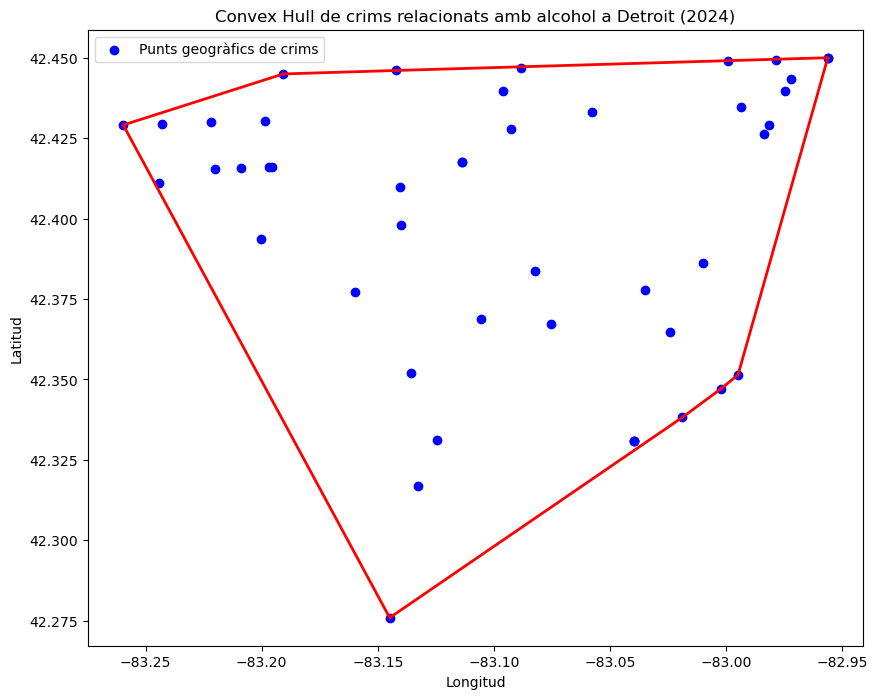

In [50]:
# Faig el gràfic dels punts i el Convex Hull
plt.figure(figsize=(10, 8))
plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue', label='Punts geogràfics de crims')
for simplex in hull.simplices:
    plt.plot(coordinates[simplex, 0], coordinates[simplex, 1], 'r-', linewidth=2)

# Configuració del gràfic
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Convex Hull de crims relacionats amb alcohol a Detroit (2024)')
plt.legend()
plt.show()

Per tenir un gràfic més bonic, a continuació grafico el mateix però afegint-li un **llegenda diferenciant els barris** d'on s'ha comés cadascun dels crims, fent que cada punt del gràfic tingui el color corresponent al seu barri. Per la llegenda utilitzo un mapa de colors ("*color map*) anomenat `tab20`, i li assigno a cada barri un color distint d'aquest mapa de colors (a la variable `neighborhood_colors`). Amb això fet, primer poso els punts amb el seu color corresponent en el gràfic amb el primer *for loop* (`for neighborhood in unique_neighborhoods`), i ja en el segon *for loop* (el de `for simplex in hull.simplices`) calculo el *convex hull i grafico els segments de la closca al voltant dels punts més extrems del gràfic.

Havent fet això, obtinc el mateix gràfic que abans, però ara amb la informació addicional dels barris on han passat cadascun dels 45 crims del *dataset* que tenim a mà. És una manera d'enriquir el treball fet i fer la visualització més atractiva a l'usuari final:

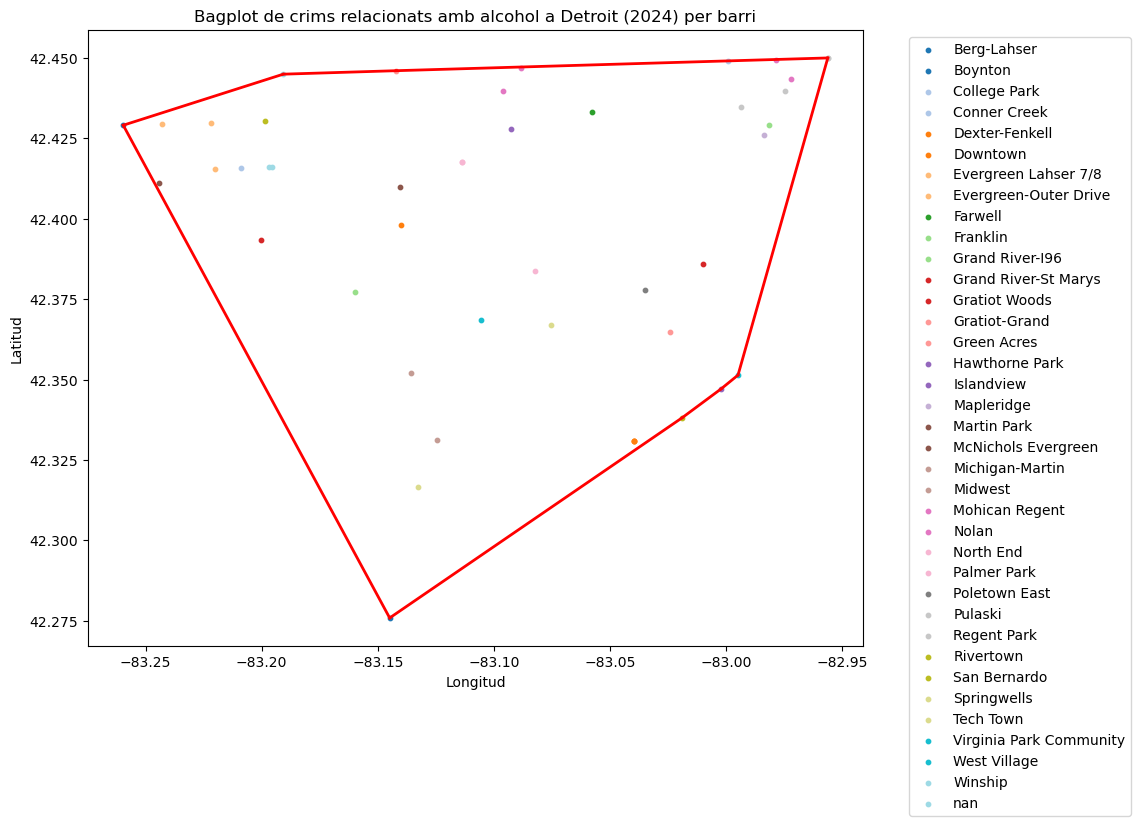

In [54]:
# Extreu les coordenades de latitud i longitud i els barris
coordinates = df[['longitude', 'latitude']].values
neighborhoods = df['neighborhood'].astype(str).fillna('Unknown').values # Afegeixo "Unknown" per valors nuls o buits

# Assigno un color únic a cada barri
unique_neighborhoods = np.unique(neighborhoods)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_neighborhoods)))
neighborhood_colors = {neighborhood: color for neighborhood, color in zip(unique_neighborhoods, colors)}

# Grafico els punts i el Convex Hull amb colors per cada barri
plt.figure(figsize=(10, 8))

# Itero per cada barri i grafico els punts amb el color assignat
for neighborhood in unique_neighborhoods:
    mask = neighborhoods == neighborhood
    plt.scatter(coordinates[mask, 0], coordinates[mask, 1], 
                color=neighborhood_colors[neighborhood], label=neighborhood, s=10)

# Calculo el Convex Hull i grafico els segments amb el color segons el barri
hull = ConvexHull(coordinates)
for simplex in hull.simplices:
    # Obtinc els colors dels punts extrems segons el barri
    neighborhood1 = neighborhoods[simplex[0]]
    neighborhood2 = neighborhoods[simplex[1]]
    color = neighborhood_colors[neighborhood1] if neighborhood1 == neighborhood2 else 'red'
    plt.plot(coordinates[simplex, 0], coordinates[simplex, 1], color=color, linewidth=2)

# Configuro del gràfic
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Bagplot de crims relacionats amb alcohol a Detroit (2024) per barri')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Per acabar, he volgut acabar de perfeccionar el gràfic anterior **traient la llegenda** i **posant amb text el barri al costat de cada punt** del *convex hull* utilitzant la funció de `plt.text()`. Amb aquest retoc, s'augmenta així l'espai útil sent utilitzat ja que no hi ha el requadre a la dreta de la llegenda que estava ocupant un espai bastant significant. A més, amb el text al costat de cada punt, i mantenint el mapa de colors d'abans, podem ràpidament identificar en quin barri es troba cada crim: 

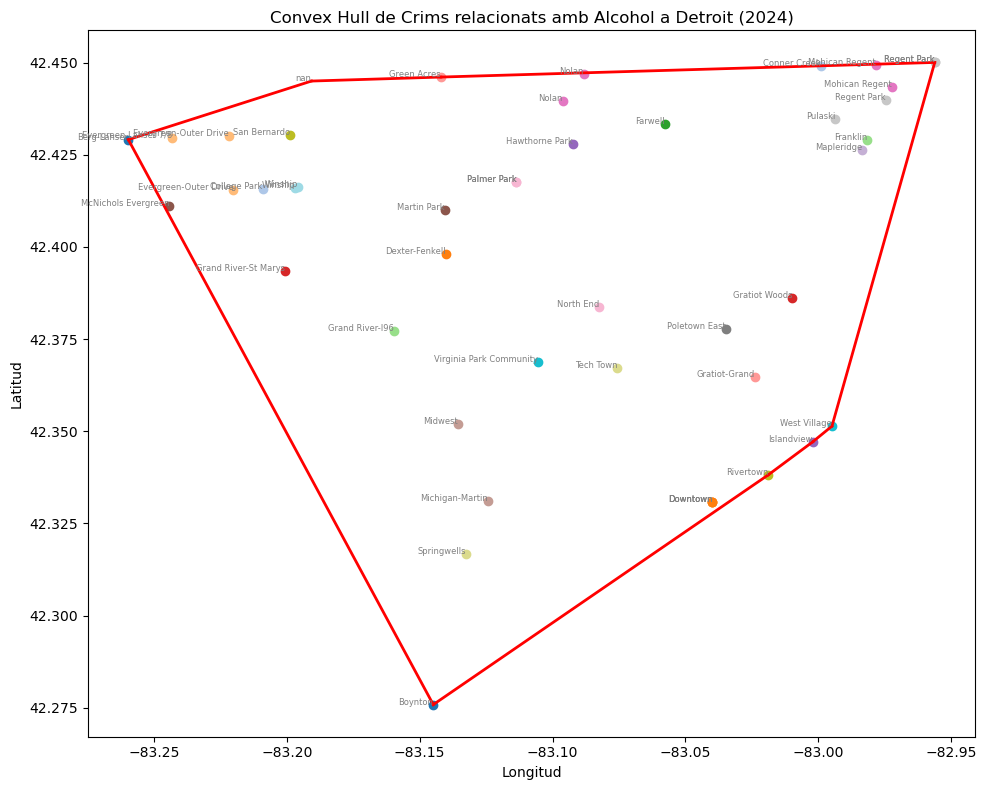

In [59]:
# Grafico els punts i el Convex Hull
plt.figure(figsize=(10, 8))
for neighborhood in unique_neighborhoods:
    neighborhood_points = df[df['neighborhood'] == neighborhood][['longitude', 'latitude']].values
    plt.scatter(neighborhood_points[:, 0], neighborhood_points[:, 1],
                label=neighborhood, color=neighborhood_colors[neighborhood])

# Dibuixo el Convex Hull
for simplex in hull.simplices:
    plt.plot(coordinates[simplex, 0], coordinates[simplex, 1], 'r-', linewidth=2)

# Afegeixo el nom del barri a cada punt
for i, (x, y) in enumerate(coordinates):
    plt.text(x, y, neighborhoods[i], fontsize=6, ha='right', color='grey') 

# Configuració del gràfic
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Convex Hull de Crims relacionats amb Alcohol a Detroit (2024)')
plt.tight_layout()
plt.show()